# Jarvis’s Algorithm or Gift Wrapping

I used the following pseudocode from https://en.wikipedia.org/wiki/Gift_wrapping_algorithm

```
algorithm jarvis(S) is
    // S is the set of points
    // P will be the set of points which form the convex hull. Final set size is i.
    pointOnHull = leftmost point in S // which is guaranteed to be part of the CH(S)
    i := 0
    repeat
        P[i] := pointOnHull
        endpoint := S[0]      // initial endpoint for a candidate edge on the hull
        for j from 0 to |S| do
            // endpoint == pointOnHull is a rare case and can happen only when j == 1 and a better endpoint has not yet been set for the loop
            if (endpoint == pointOnHull) or (S[j] is on left of line from P[i] to endpoint) then
                endpoint := S[j]   // found greater left turn, update endpoint
        i := i + 1
        pointOnHull = endpoint
    until endpoint = P[0]      // wrapped around to first hull point
```

In [360]:
from matplotlib import pyplot as plt # for plotting
from random import randint # for sorting and creating data pts
from math import atan2 # for computing polar angle
import time

class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

def find_leftmost_point_index(points):
    leftmost = 0
    for i in range(1,len(points)):
        if points[i].x < points[leftmost].x: 
            leftmost = i
        elif points[i].x == points[leftmost].x:
            if points[i].y > points[leftmost].y:
                leftmost = i
    return leftmost

def find_triplet_orientation(p, q, r):
    val = (q.y - p.y) * (r.x - q.x) - (q.x - p.x) * (r.y - q.y)

    if val == 0: return -1  # collinear
    elif val > 0: return 0 # clockwise
    else: return 1         # counterclockwise

def find_convex_hull(points, n):

    figure, ax = plt.subplots(figsize=(10,10))
    axes = figure.axes
    plt.ion()
    for point in input_points:
        plt.scatter(point[0], point[1], color = 'red')
    
    convex_points = []
    leftmost_point = find_leftmost_point_index(points)
    hull = []

    
    p = leftmost_point
    q = 0
    current = 0
    
    #This loop runs O(h) times where h is number of points in result
    while(True):
        hull.append(p)
        plot_color(plt, figure, points, p)
        
        if len(hull) > 1:
            x1, y1, x2, y2 = get_drawing_points(hull, current, current+1, points) 
            current +=1
            draw_line(x1, y1, x2, y2, figure, ax, color = 'green')
    
        q = (p + 1) % n
        for i in range(n):
#             plot_color(plt, figure, points, q, color = 'blue')
            
            x1, y1 = points[q].x, points[q].y
            x2, y2 = points[i].x, points[i].y
            
            draw_line(x1, y1, x2, y2, figure, ax, color = 'blue')
#             remove_line(axes, figure)
            
            if(find_triplet_orientation(points[p], points[i], points[q]) > 0):
                q = i
        
#         plot_color(plt, figure, points, q, color = 'red')    
        p = q

        if(p == leftmost_point): 
            x1, y1, x2, y2 = get_drawing_points(hull, 0, -1, points)
            draw_line(x1, y1, x2, y2, figure, ax, color = 'green')
            break

    for each in hull:
        convex_points.append([points[each].x, points[each].y])
        
    plt.show()
    return convex_points

In [2]:
def get_drawing_points(hull, first, second, points):
    first = hull[first]
    second = hull[second]
    x1, y1 = points[first].x, points[first].y
    x2, y2 = points[second].x, points[second].y
    
    return x1, y1, x2, y2

In [432]:
def plot_color(plt, figure, points, p, speed = 0.00000001, color = 'green'):
    plt.scatter(points[p].x, points[p].y, color = color)
        
    figure.canvas.draw()
    figure.canvas.flush_events()
#     time.sleep(speed)

In [417]:
def draw_line(x1, y1, x2, y2, figure, ax, color = 'green'):
    ax.plot([x1, x2], [y1, y2], color = color)
    figure.canvas.draw()
    figure.canvas.flush_events()
    time.sleep(0.00001)

In [294]:
def remove_line(axes, figure, i=-2):
    axes[0].lines[i].remove()
    figure.canvas.draw()
    figure.canvas.flush_events()
#     time.sleep(0.005)

In [32]:
loc, scale = 0., 10.
s = np.random.laplace(loc, scale, 10)

In [33]:
s

array([  0.4269813 ,  -3.0809975 ,  12.1738265 ,   1.46863579,
         2.56753931,  34.15046014,  -3.78565026, -32.32611983,
        22.93151844, -13.1916413 ])

In [65]:
import random
R = 2

def sample_circle(center):
    a = random.random() * 2 * np.pi
    r = R * np.sqrt(random.random())
    x = center[0]+ (r * np.cos(a))
    y = center[1] + (r * np.sin(a))
    return 2*x,y

ps = np.array([sample_circle((19,19)) for i in range(100)])

plt.plot(ps[:,0],ps[:,1],'.')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.show()

In [357]:
points = []

from random import randint
N = 20
input_points = []

for i in range(7):
    x = randint(7, 20)
    y = randint(16, 20)
    points.append(Point(x, y))
    input_points.append([x, y])
    
for i in range(10):
    x = randint(2, 4)
    y = randint(2, 4)
    points.append(Point(x, y))
    input_points.append([x, y])
    
for i in range(13):
    x = randint(0, 15)
    y = randint(6, 10)
    points.append(Point(x, y))
    input_points.append([x, y])

In [59]:
x, y = np.array([sample_circle((5,5))])[0]

In [60]:
x, y

(5.606217639445624, 4.8403930673984465)

<IPython.core.display.Javascript object>


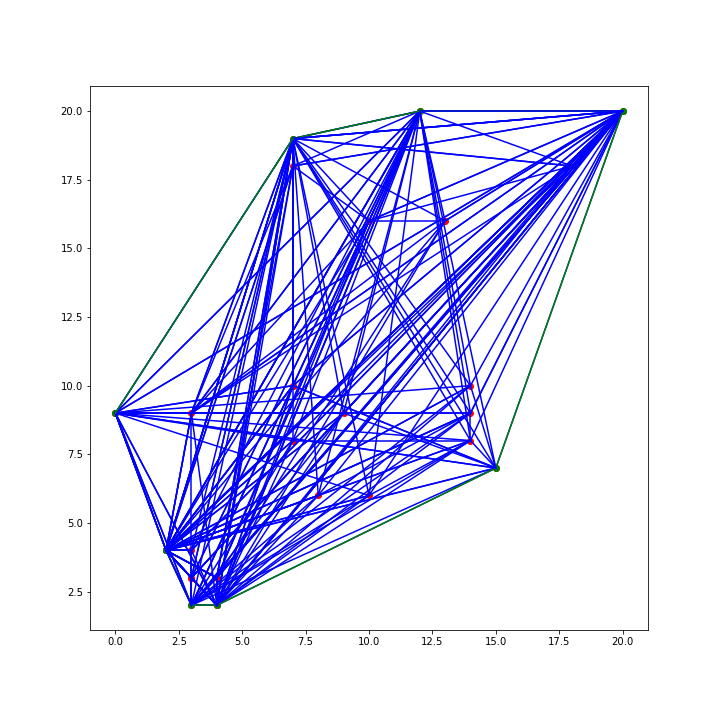

In [361]:
res = find_convex_hull(points, len(points))

In [ ]:
point

<IPython.core.display.Javascript object>


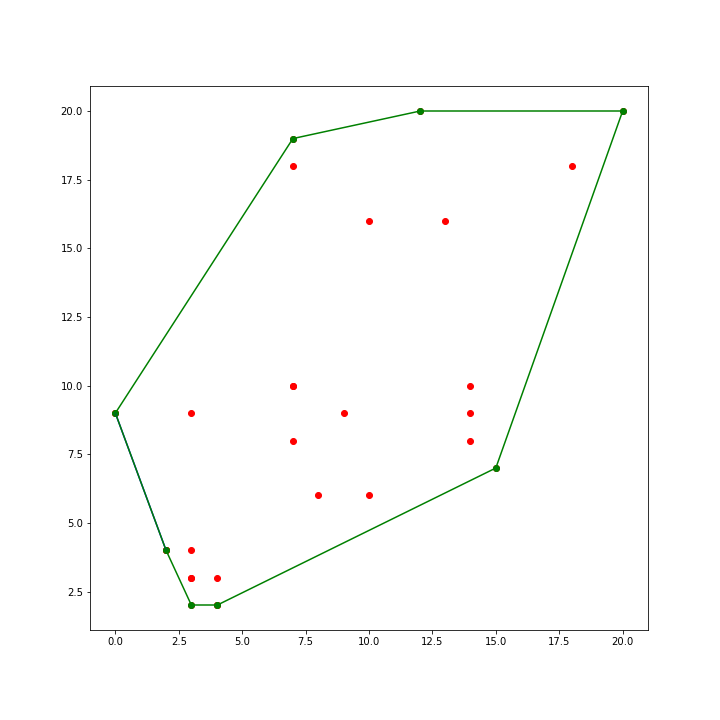

In [433]:
figure, ax = plt.subplots(figsize=(10,10))
axes = figure.axes

for point in input_points:
    plt.scatter(point[0], point[1], color = 'red')
    
leftmost_point = find_leftmost_point_index(points)

# x1, y1 = left.x, left.y,
# x2, y2 = right.x, right.y
l1, l2 = points[leftmost_point].x, points[leftmost_point].y
plt.scatter(l1, l2, color = 'green')

draw_line(points[0].x, points[0].y, l1, l2, figure, ax, color = 'blue') 
remove_line(axes, figure, i=-1)
draw_line(points[1].x, points[1].y, l1, l2, figure, ax, color = 'blue') 
remove_line(axes, figure, i=-1)
draw_line(points[2].x, points[2].y, l1, l2, figure, ax, color = 'blue') 
remove_line(axes, figure, i=-1)
draw_line(points[3].x, points[3].y, l1, l2, figure, ax, color = 'blue') 
remove_line(axes, figure, i=-1)
draw_line(points[4].x, points[4].y, l1, l2, figure, ax, color = 'blue') 
remove_line(axes, figure, i=-1)
draw_line(points[5].x, points[5].y, l1, l2, figure, ax, color = 'blue') 
remove_line(axes, figure, i=-1)
draw_line(points[6].x, points[6].y, l1, l2, figure, ax, color = 'blue') 
remove_line(axes, figure, i=-1)
draw_line(points[7].x, points[7].y, l1, l2, figure, ax, color = 'blue') 
# remove_line(axes, figure, i=-1)
draw_line(points[8].x, points[8].y, l1, l2, figure, ax, color = 'green') 
np1, np2 = points[8].x, points[8].y
plt.scatter(np1, np2, color = 'green')

for i in range(0, 11):
    draw_line(points[i].x, points[i].y, np1, np2, figure, ax, color = 'blue')
    remove_line(axes, figure, i=-1)

draw_line(points[12].x, points[12].y, np1, np2, figure, ax, color = 'green')

np1, np2 = points[12].x, points[12].y
plt.scatter(np1, np2, color = 'green')
for i in range(0, 9):
    draw_line(points[i].x, points[i].y, np1, np2, figure, ax, color = 'blue')
    remove_line(axes, figure, i=-1)
    
draw_line(points[9].x, points[9].y, np1, np2, figure, ax, color = 'green')

np1, np2 = points[9].x, points[9].y
plt.scatter(np1, np2, color = 'green')
for i in range(0, 24):
    draw_line(points[i].x, points[i].y, np1, np2, figure, ax, color = 'blue')
    remove_line(axes, figure, i=-1)
    
draw_line(points[24].x, points[24].y, np1, np2, figure, ax, color = 'green')

np1, np2 = points[24].x, points[24].y
plt.scatter(np1, np2, color = 'green')
for i in range(0, 1):
    draw_line(points[i].x, points[i].y, np1, np2, figure, ax, color = 'blue')
    remove_line(axes, figure, i=-1)
    
draw_line(points[1].x, points[1].y, np1, np2, figure, ax, color = 'green')


np1, np2 = points[1].x, points[1].y
plt.scatter(np1, np2, color = 'green')
for i in range(0, 2):
    draw_line(points[i].x, points[i].y, np1, np2, figure, ax, color = 'blue')
    remove_line(axes, figure, i=-1)
    
draw_line(points[2].x, points[2].y, np1, np2, figure, ax, color = 'green')

np1, np2 = points[2].x, points[2].y
plt.scatter(np1, np2, color = 'green')
for i in range(0, 1):
    draw_line(points[i].x, points[i].y, np1, np2, figure, ax, color = 'green')

np1, np2 = points[0].x, points[0].y
plt.scatter(np1, np2, color = 'green')

for i in range(0, 7):
    draw_line(points[i].x, points[i].y, np1, np2, figure, ax, color = 'blue')
    remove_line(axes, figure, i=-1)


draw_line(np1, np2, l1, l2, figure, ax, color = 'green')

# remove_line(axes, figure, i=-1)
# draw_line(points[9].x, points[9].y, l1, l2, figure, ax, color = 'blue') 

# draw_line(points[10].x, points[10].y, l1, l2, figure, ax, color = 'blue') 
# draw_line(points[11].x, points[11].y, l1, l2, figure, ax, color = 'blue') 

# plt.scatter(x2, y2, color = 'red')

# draw_line(x1, y1, x2, y2, figure, ax, color = 'red')  
    
# for point in upper:
#     plt.scatter(point.x, point.y, color = 'orange')
    
# for point in lower:
#     plt.scatter(point.x, point.y, color = 'green')
    
# plt.scatter(c.x, c.y, color = 'blue')
# plt.scatter(d.x, d.y, color = 'blue')



# remove_line(axes, figure, -5)

# draw_line(x1, y1, 9, 20, figure, ax, color = 'green')
# plt.scatter(x1, y1, color = 'green')
# plt.scatter(3, 20, color = 'green')
# plt.scatter(4, 20, color = 'green')
# plt.scatter(9, 20, color ='green')
# draw_line(c.x, c.y, 9, 20, figure, ax, color = 'green')  
# plt.scatter(c.x, c.y, color = 'green')

# remove_line(axes, figure, -6)

# draw_line(c.x, c.y, 19, 16, figure, ax, color = 'green')  
# plt.scatter(c.x, c.y, color = 'green')
# plt.scatter(19, 16, color ='green')
# draw_line(19, 16, x2, y2, figure, ax, color = 'green')  
# plt.scatter(x2, y2, color = 'green')

# remove_line(axes, figure, -7)

# draw_line(x1, y1, d.x, d.y, figure, ax, color = 'green') 

# draw_line(x2, y2, 17, 1, figure, ax, color = 'blue') 
# draw_line(0, 0, 17, 1, figure, ax, color = 'blue') 
# plt.scatter(0, 0, color = 'green')

# remove_line(axes, figure, -8)

# draw_line(0, 0, 7, 0, figure, ax, color = 'green')  
# draw_line(7, 0, 17, 1, figure, ax, color = 'green') 

# remove_line(axes, figure, -3)

# draw_line(x2, y2, 19, 6, figure, ax, color = 'blue')  
# draw_line(19, 6, 17, 1, figure, ax, color = 'green') 

# remove_line(axes, figure, -5)

# draw_line(x2, y2, 20, 10, figure, ax, color = 'green')  
# draw_line(20, 10, 19, 6, figure, ax, color = 'green') 

# remove_line(axes, figure, -4)

In [8]:
p = graham_scan(points)

NameError: name 'graham_scan' is not defined

In [46]:
for po in p:
    print(po.x, po.y)

15 0
24 6
22 11
11 25
2 22
0 5
1 3
5 2


In [41]:
for po in res:
    print(po.x, po.y)

15 0
24 6
18 3
22 11
16 10
15 10
13 16
11 25
10 22
9 24
12 11
8 23
10 9
2 22
6 11
3 12
3 12
3 12
1 12
5 7
1 8
4 6
0 5
1 3
5 2


In [421]:
res

[[3, 14], [4, 2], [18, 0], [21, 0], [24, 11], [25, 15], [25, 23], [7, 24]]

In [73]:
def remove_line(axes, figure):
    axes[0].lines[0].remove()
    figure.canvas.draw()
    figure.canvas.flush_events()
    time.sleep(0.00005)

<IPython.core.display.Javascript object>


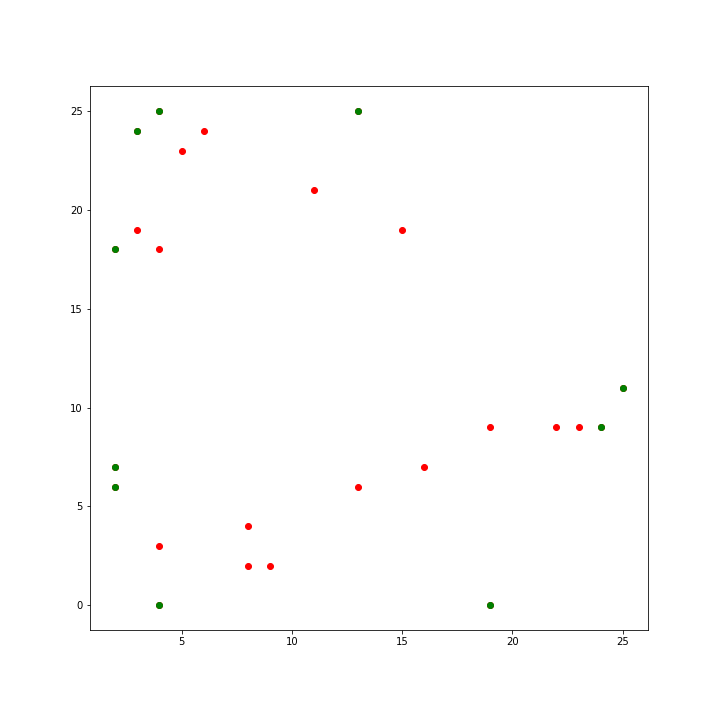

In [92]:
import numpy as np
import matplotlib.pyplot as plt
import time

figure, ax = plt.subplots(figsize=(10,10))

axes = figure.axes
plt.ion()

for point in input_points:
    plt.scatter(point[0], point[1], color = 'red')
    
for point in res:
    plt.scatter(point[0], point[1], color = 'green')
    figure.canvas.draw()
    figure.canvas.flush_events()
    time.sleep(0.00005)
    
for i in range(len(res)-1):
    x1, y1 = res[i][0], res[i][1]
    x2, y2 = res[i+1][0], res[i+1][1]
    
    draw_line(x1, y1, x2, y2, figure, ax)
    

x1, y1 = res[0][0], res[0][1]
x2, y2 = res[-1][0], res[-1][1]
draw_line(x1, y1, x2, y2, figure, ax)

for i in range(len(res)-1):
    remove_line(axes, figure)

remove_line(axes, figure)
plt.show()

# Graham Scan

I used the following presudocode from https://en.wikipedia.org/wiki/Graham_scan and https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%93%D1%80%D1%8D%D1%85%D0%B5%D0%BC%D0%B0

```
let points be the list of points
let stack = empty_stack()

find the lowest y-coordinate and leftmost point, called P0
sort points by polar angle with P0, if several points have the same polar angle then only keep the farthest

for point in points:
    # pop the last point from the stack if we turn clockwise to reach this point
    while count stack > 1 and ccw(next_to_top(stack), top(stack), point) <= 0:
        pop stack
    push point to stack
end
```

In [117]:
import math
def find_polar_angle(point):
    global p0
    atan = math.atan2(p0.y-point.y, p0.x-point.x)
    return (atan, point.y**2+point.x**2) if atan >= 0 else (2*math.pi + atan, point.x**2+point.y**2)

In [41]:
def find_lowest_point_index(points):
    lowest = 0
    for i in range(1,len(points)):
        if points[i].y < points[lowest].y: 
            lowest = i
        elif points[i].y == points[lowest].y:
            if points[i].x < points[lowest].x:
                lowest = i
    return lowest

In [42]:
def distance(point1, point2):
    x_d = (point1.x - point2.x)
    y_d = (point1.y - point2.y)
    
    return x_d**2 + y_d**2

In [118]:
#anchor point
p0 = points[find_lowest_point_index(points)]

In [44]:
def sort_by_polar_angle(points):
    return sorted(points, key=find_polar_angle)

In [45]:
def graham_scan(points):
    global p0
    
    figure, ax = plt.subplots(figsize=(10,10))
    axes = figure.axes
    plt.ion()
    for point in input_points:
        plt.scatter(point[0], point[1], color = 'red')
    
    
    sorted_by_angle = sort_by_polar_angle(points)
    
    convex = []
    convex.append(sorted_by_angle[0])
    convex.append(sorted_by_angle[1])
    
    plot_color(plt, figure, convex, 0, color = 'green')
    plot_color(plt, figure, convex, 1, color = 'green')
    
    x1, y1 = convex[0].x, convex[0].y
    x2, y2 = convex[1].x, convex[1].y
            
    draw_line(x1, y1, x2, y2, figure, ax, color = 'blue')   

    start = convex[1]
    end = convex[1]
    for i in range(2, len(sorted_by_angle)):
        end = sorted_by_angle[i]
        x1, y1 = convex[-1].x, convex[-1].y
        x2, y2 = sorted_by_angle[i].x, sorted_by_angle[i].y

        draw_line(x1, y1, x2, y2, figure, ax, color = 'blue')  
        
        while len(convex)!= 1 and find_triplet_orientation(convex[-2], convex[-1], sorted_by_angle[i]) < 1:
            poped = convex.pop()
            print(poped.x, poped.y)
            plot_color(plt, figure, [poped], 0, color = 'red')
#             remove_line(axes, figure)
            
     
        convex.append(sorted_by_angle[i])
        plot_color(plt, figure, sorted_by_angle, i)
        
    x1, y1 = convex[-1].x, convex[-1].y
    x2, y2 = convex[0].x, convex[0].y
    
    print(x1, x2, y1, y2)

    draw_line(x1, y1, x2, y2, figure, ax, color = 'blue')   
    
    plt.show()
    return convex

<IPython.core.display.Javascript object>


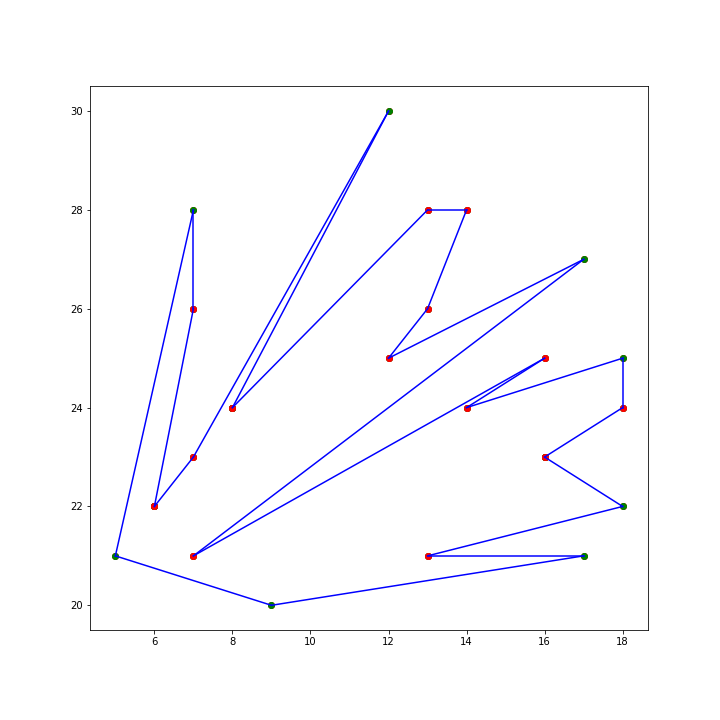

13 21
16 23
16 23
18 24
14 24
7 21
16 25
12 25
13 26
8 24
8 24
13 28
14 28
7 23
6 22
6 22
7 26
5 9 21 20


In [84]:
gs = graham_scan(points)

In [230]:
p =  find_lowest_point_index(points)

In [114]:
for point in sp:
    print(point.x, point.y)

0 9
1 10
0 4
0 4
1 3
1 2
2 6
1 1
3 0
4 10
5 6
6 3
6 7
6 8
7 3
7 8
9 0
8 6
10 4
9 9


In [229]:
points

In [120]:
sp = sort_by_polar_angle(points)

<IPython.core.display.Javascript object>


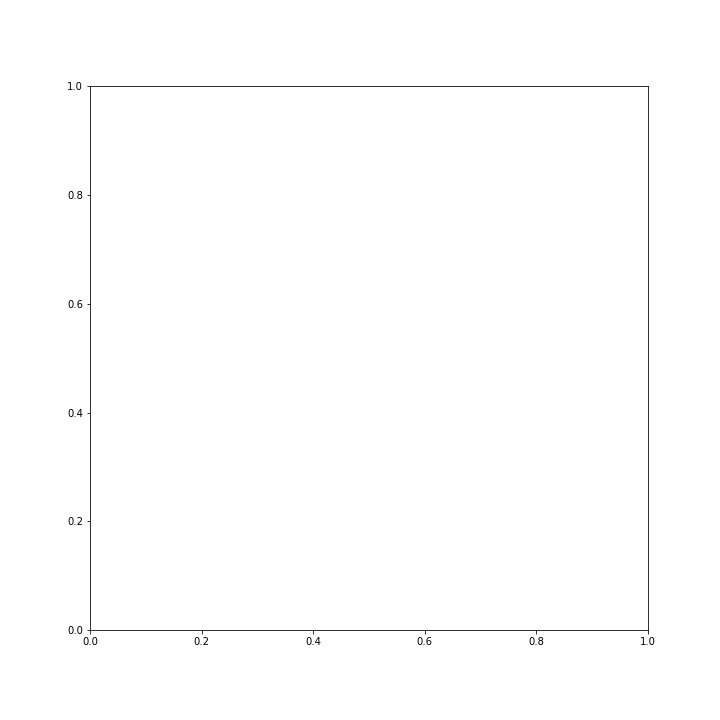

TypeError: list indices must be integers or slices, not Point

In [228]:
figure, ax = plt.subplots(figsize=(10,10))
axes = figure.axes

plt.scatter(points[p].x, points[p].y, color = "red")

x2, y2 = points[p].x, points[p].y
for point in sp:
    plt.scatter(point.x, point.y, color = "blue")

    
for point in sp:

    x1, y1 = point.x, point.y
    draw_line(x1, y1, x2, y2, figure, ax, color = 'green')    
    
    
plt.scatter(points[p].x, points[p].y, color = "red")
plt.show()

<IPython.core.display.Javascript object>


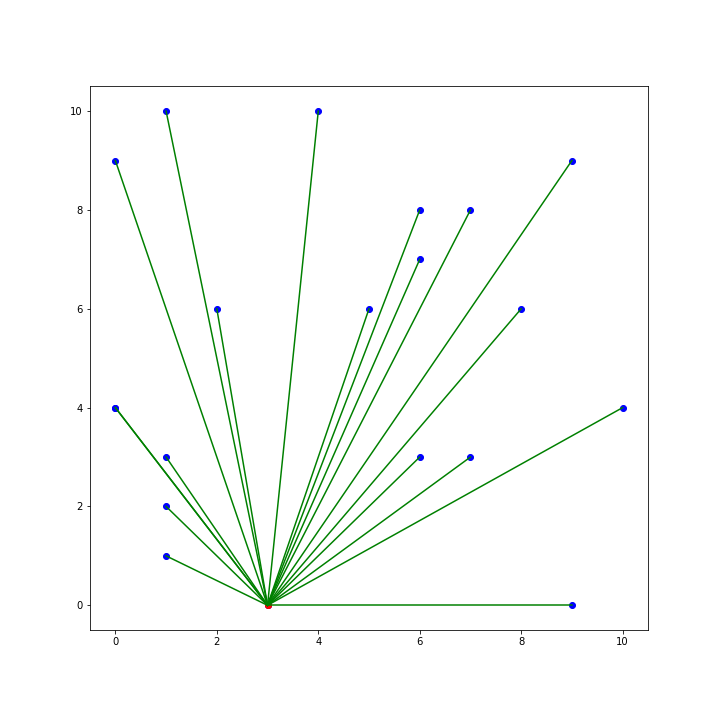

In [170]:
figure, ax = plt.subplots(figsize=(10,10))
axes = figure.axes

plt.scatter(points[p].x, points[p].y, color = "red")

x2, y2 = points[p].x, points[p].y
for point in sp:
    plt.scatter(point.x, point.y, color = "blue")

    
for point in sp:

    x1, y1 = point.x, point.y
    draw_line(x1, y1, x2, y2, figure, ax, color = 'green')    
    
    
plt.scatter(points[p].x, points[p].y, color = "red")
plt.show()

<IPython.core.display.Javascript object>


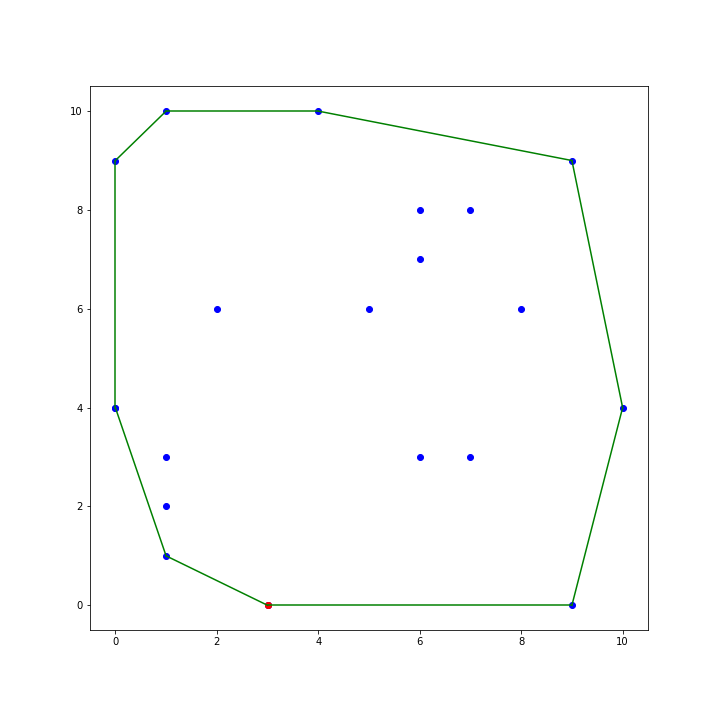

In [232]:
figure, ax = plt.subplots(figsize=(10,10))
axes = figure.axes

plt.scatter(points[p].x, points[p].y, color = "red")

for point in sp:
    plt.scatter(point.x, point.y, color = "blue")
    
plt.scatter(points[p].x, points[p].y, color = "red")    

x1, y1 = sp[0].x, sp[0].y
x2, y2 = sp[1].x, sp[1].y
draw_line(x1, y1, x2, y2, figure, ax, color = 'green')    
    
x1, y1 = sp[1].x, sp[1].y
x2, y2 = sp[2].x, sp[2].y
draw_line(x1, y1, x2, y2, figure, ax, color = 'green')

x1, y1 = sp[2].x, sp[2].y
x2, y2 = sp[3].x, sp[3].y
draw_line(x1, y1, x2, y2, figure, ax, color = 'green')
    
x1, y1 = sp[3].x, sp[3].y
x2, y2 = sp[4].x, sp[4].y
draw_line(x1, y1, x2, y2, figure, ax, color = 'red')

x1, y1 = sp[2].x, sp[2].y
x2, y2 = sp[3].x, sp[3].y
draw_line(x1, y1, x2, y2, figure, ax, color = 'red')


x1, y1 = sp[2].x, sp[2].y
x2, y2 = sp[4].x, sp[4].y
draw_line(x1, y1, x2, y2, figure, ax, color = 'green')

remove_line(axes, figure)
remove_line(axes, figure)
remove_line(axes, figure)

x1, y1 = sp[4].x, sp[4].y
x2, y2 = sp[5].x, sp[5].y
draw_line(x1, y1, x2, y2, figure, ax, color = 'red')

remove_line(axes, figure)

x1, y1 = sp[2].x, sp[2].y
x2, y2 = sp[5].x, sp[5].y
draw_line(x1, y1, x2, y2, figure, ax, color = 'green')

remove_line(axes, figure)

x1, y1 = sp[5].x, sp[5].y
x2, y2 = sp[6].x, sp[6].y
draw_line(x1, y1, x2, y2, figure, ax, color = 'red')

remove_line(axes, figure)

x1, y1 = sp[2].x, sp[2].y
x2, y2 = sp[6].x, sp[6].y
draw_line(x1, y1, x2, y2, figure, ax, color = 'green')

remove_line(axes, figure)


x1, y1 = sp[6].x, sp[6].y
x2, y2 = sp[7].x, sp[7].y
draw_line(x1, y1, x2, y2, figure, ax, color = 'green')

x1, y1 = sp[7].x, sp[7].y
x2, y2 = sp[8].x, sp[8].y
draw_line(x1, y1, x2, y2, figure, ax, color = 'green')

x1, y1 = sp[8].x, sp[8].y
x2, y2 = sp[9].x, sp[9].y
draw_line(x1, y1, x2, y2, figure, ax, color = 'red')

remove_line(axes, figure)

x1, y1 = sp[7].x, sp[7].y
x2, y2 = sp[9].x, sp[9].y
draw_line(x1, y1, x2, y2, figure, ax, color = 'green')

remove_line(axes, figure)


x1, y1 = sp[9].x, sp[9].y
x2, y2 = sp[10].x, sp[10].y
draw_line(x1, y1, x2, y2, figure, ax, color = 'green')

x1, y1 = sp[10].x, sp[10].y
x2, y2 = sp[11].x, sp[11].y
draw_line(x1, y1, x2, y2, figure, ax, color = 'red')

remove_line(axes, figure)
x1, y1 = sp[9].x, sp[9].y
x2, y2 = sp[11].x, sp[11].y
draw_line(x1, y1, x2, y2, figure, ax, color = 'red')

remove_line(axes, figure)

x1, y1 = sp[7].x, sp[7].y
x2, y2 = sp[11].x, sp[11].y
draw_line(x1, y1, x2, y2, figure, ax, color = 'red')

remove_line(axes, figure)
remove_line(axes, figure)

x1, y1 = sp[6].x, sp[6].y
x2, y2 = sp[11].x, sp[11].y
draw_line(x1, y1, x2, y2, figure, ax, color = 'green')

remove_line(axes, figure)
remove_line(axes, figure)

x1, y1 = sp[11].x, sp[11].y
x2, y2 = sp[12].x, sp[12].y
draw_line(x1, y1, x2, y2, figure, ax, color = 'green')

x1, y1 = sp[12].x, sp[12].y
x2, y2 = sp[13].x, sp[13].y
draw_line(x1, y1, x2, y2, figure, ax, color = 'red')

remove_line(axes, figure)

x1, y1 = sp[11].x, sp[11].y
x2, y2 = sp[13].x, sp[13].y
draw_line(x1, y1, x2, y2, figure, ax, color = 'green')

remove_line(axes, figure)

x1, y1 = sp[13].x, sp[13].y
x2, y2 = sp[14].x, sp[14].y
draw_line(x1, y1, x2, y2, figure, ax, color = 'green')

x1, y1 = sp[14].x, sp[14].y
x2, y2 = sp[15].x, sp[15].y
draw_line(x1, y1, x2, y2, figure, ax, color = 'green')

x1, y1 = sp[15].x, sp[15].y
x2, y2 = sp[16].x, sp[16].y
draw_line(x1, y1, x2, y2, figure, ax, color = 'red')

remove_line(axes, figure)

x1, y1 = sp[14].x, sp[14].y
x2, y2 = sp[16].x, sp[16].y
draw_line(x1, y1, x2, y2, figure, ax, color = 'green')

remove_line(axes, figure)

x1, y1 = sp[16].x, sp[16].y
x2, y2 = sp[17].x, sp[17].y
draw_line(x1, y1, x2, y2, figure, ax, color = 'green')

x1, y1 = sp[17].x, sp[17].y
x2, y2 = sp[18].x, sp[18].y
draw_line(x1, y1, x2, y2, figure, ax, color = 'green')


x1, y1 = sp[18].x, sp[18].y
x2, y2 = sp[19].x, sp[19].y
draw_line(x1, y1, x2, y2, figure, ax, color = 'red')

remove_line(axes, figure)

x1, y1 = sp[17].x, sp[17].y
x2, y2 = sp[19].x, sp[19].y
draw_line(x1, y1, x2, y2, figure, ax, color = 'green')

remove_line(axes, figure)

x1, y1 = sp[19].x, sp[19].y
x2, y2 = sp[0].x, sp[0].y
draw_line(x1, y1, x2, y2, figure, ax, color = 'green')


plt.show()

In [225]:
for p in gs:
    print(p.x, p.y)

9 20
17 21
18 22
18 25
17 27
12 30
7 28
5 21


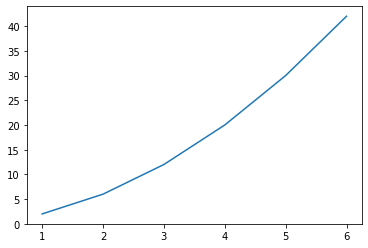

[1, 2, 3, 4, 5, 6]


In [18]:
import matplotlib.pyplot as plt
import time
%matplotlib inline
fig = plt.figure()
axes = fig.add_subplot(111)

hfig = display(fig, display_id=True)
values = [1,2,3,4,5,6]

def draw():
    #fig.clf()
    axes.plot(values, [v*v for v in values])
    fig.canvas.draw()
    hfig.update(fig)
    time.sleep(1)

def update():
    print(str(values))
    axes.cla()
    axes.plot(values, [v*(v+1) for v in values])
    fig.canvas.draw()
    hfig.update(fig)

draw()
time.sleep(1)
update()
plt.close(fig)

<IPython.core.display.Javascript object>


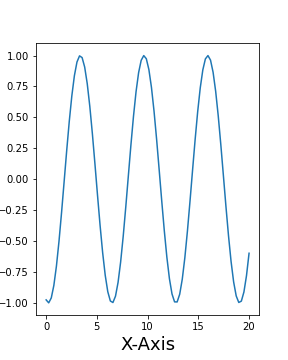

In [19]:
%matplotlib notebook

# Import Library


import numpy as np
import time
import matplotlib.pyplot as plt

# Create subplots

figure, ax = plt.subplots(figsize=(4,5))

# Data Coordinates

x = np.linspace(0, 20, 80)
y = np.sin(x)

# GUI

plt.ion()

#  Plot

plot1, = ax.plot(x, y)

# Labels

plt.xlabel("X-Axis",fontsize=18)
plt.ylabel("Y-Axis",fontsize=18)

for value in range(150):
    update_y_value = np.sin(x-2.5*value)
    
    plot1.set_xdata(x)
    plot1.set_ydata(update_y_value)
    
    figure.canvas.draw()
    figure.canvas.flush_events()
    time.sleep(0.1)


# Display

plt.show()

<IPython.core.display.Javascript object>


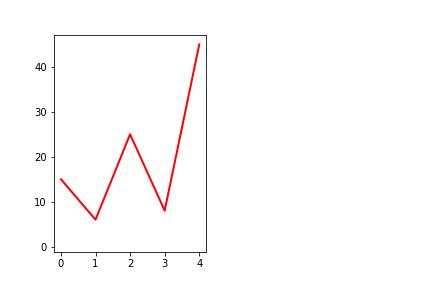

/Users/anhelinalohvina/opt/anaconda3/envs/Daily/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


In [20]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 1)

axes = fig.axes  # = [ax1, ax2]

# add two lines to ax1
ax1.plot([0, 1, 2, 3, 4], [10, 1, 20, 3, 40], lw=2, color='k', label='2 Hz')

fig.canvas.draw()
fig.canvas.flush_events()
time.sleep(1)


ax1.plot([0, 1, 2, 3, 4], [15, 6, 25, 8, 45], lw=2, color='r', label='4 Hz')

# remove one line from ax1
ax1.lines[0].remove()  # remove the first line in ax1
# axes[0].lines[0].remove()  # equivalent to the line above


# Quickhull

I used the following pseudocode: https://en.wikipedia.org/wiki/Quickhull

```
Input = a set S of n points 
Assume that there are at least 2 points in the input set S of points

function QuickHull(S) is
    // Find convex hull from the set S of n points
    Convex Hull := {} 
    Find left and right most points, say A & B, and add A & B to convex hull 
    Segment AB divides the remaining (n − 2) points into 2 groups S1 and S2 
        where S1 are points in S that are on the right side of the oriented line from A to B, 
        and S2 are points in S that are on the right side of the oriented line from B to A 
    FindHull(S1, A, B) 
    FindHull(S2, B, A) 
    Output := Convex Hull
end function

function FindHull(Sk, P, Q) is
    // Find points on convex hull from the set Sk of points 
    // that are on the right side of the oriented line from P to Q
    if Sk has no point then
        return
    From the given set of points in Sk, find farthest point, say C, from segment PQ 
    Add point C to convex hull at the location between P and Q 
    Three points P, Q, and C partition the remaining points of Sk into 3 subsets: S0, S1, and S2 
        where S0 are points inside triangle PCQ, S1 are points on the right side of the oriented 
        line from P to C, and S2 are points on the right side of the oriented line from C to Q. 
    FindHull(S1, P, C) 
    FindHull(S2, C, Q) 
end function
             
```

In [142]:
def find_left_right_most_points(points):
    x_left = points[0].x
    x_right = points[-1].x
    
    point_left = points[0]
    point_right = points[-1]
    
    for point in points:
        if point.x < x_left:
            x_left = point_left.x
            point_left = point
            
        if point.x > x_right:
            x_right = point.x
            point_right= point

    return point_left, point_right

In [181]:
l, r = find_left_right_most_points(points)

In [182]:
l.x, l.y, r.x, r.y

(2, 18, 25, 11)

In [ ]:
hull = {}

// End points of line L are p1 and p2.  side can have value
// 1 or -1 specifying each of the parts made by the line L
void quickHull(iPair a[], int n, iPair p1, iPair p2, int side)
{
    int ind = -1;
    int max_dist = 0;

    // finding the point with maximum distance
    // from L and also on the specified side of L.
    for (int i=0; i<n; i++)
    {
        int temp = lineDist(p1, p2, a[i]);
        if (findSide(p1, p2, a[i]) == side && temp > max_dist)
        {
            ind = i;
            max_dist = temp;
        }
    }

    // If no point is found, add the end points
    // of L to the convex hull.
    if (ind == -1)
    {
        hull.insert(p1);
        hull.insert(p2);
        return;
    }

    // Recur for the two parts divided by a[ind]
    quickHull(a, n, a[ind], p1, -findSide(a[ind], p1, p2));
    quickHull(a, n, a[ind], p2, -findSide(a[ind], p2, p1));
}

void printHull(iPair a[], int n)
{

def quickhull(points):
    
    left, right = find_left_right_most_points(points)

    find_partial_convex_hull(points, left, right) 
    
    // Recursively find convex hull points on
    // one side of line joining a[min_x] and
    // a[max_x]
    quickHull(a, n, a[min_x], a[max_x], 1);

    // Recursively find convex hull points on
    // other side of line joining a[min_x] and
    // a[max_x]
    quickHull(a, n, a[min_x], a[max_x], -1);

    cout << "The points in Convex Hull are:\n";
    while (!hull.empty())
    {
        cout << "(" <<( *hull.begin()).first << ", "
             << (*hull.begin()).second << ") ";
        hull.erase(hull.begin());
    }
}

In [ ]:


// Returns the side of point p with respect to line
// joining points p1 and p2.
int findSide(iPair p1, iPair p2, iPair p)
{
    int val = (p.second - p1.second) * (p2.first - p1.first) -
              (p2.second - p1.second) * (p.first - p1.first);

    if (val > 0)
        return 1;
    if (val < 0)
        return -1;
    return 0;
}

// returns a value proportional to the distance
// between the point p and the line joining the
// points p1 and p2
int lineDist(iPair p1, iPair p2, iPair p)
{
    return abs ((p.second - p1.second) * (p2.first - p1.first) -
               (p2.second - p1.second) * (p.first - p1.first));
}



// End points of line L are p1 and p2.  side can have value
// 1 or -1 specifying each of the parts made by the line L




In [137]:
    
# // returns a value proportional to the distance
# // between the point p and the line joining the
# // points p1 and p2
def maximum_distance_from_the_line(left, right, point):
    return abs((point.y - left.y) * (right.x - left.x) - (right.y - left.y) * (point.x - left.x))

In [273]:
def find_upper_hull(points, left, right):
    
    c_point = None;
    max_dist = 0;
    
    for point in points:
        dist = maximum_distance_from_the_line(left, right, point)
        
        if dist > max_dist:
            c_point = point
            max_dist = dist
    
    left_points = []
    right_points = []
    
    if c_point == None:
        hull.add(left)
        hull.add(right)
#         return hull

    return c_point
    
#     else:
#         for point in points:
#             orient = find_triplet_orientation(c_point, point, left)
#             if orient > 0:
#                 left_points.append(point)

#             orient = find_triplet_orientation(right, point, c_point)
#             if orient > 0:
#                 right_points.append(point)
                
#         find_upper_hull(left_points, left, c_point, hull)
#         find_upper_hull(right_points, c_point, right, hull)
        
        
        
#     return left_points, right_points, c_point
    
    



    
#     else:
#         find_partial_quickHull(a, n, a[ind], p1, -findSide(a[ind], p1, p2))
#         find_partial_quickHull(a, n, a[ind], p2, -findSide(a[ind], p2, p1))

   
    
#     find_partial_quickHull(upper_points, n, left, right)
#     find_partial_quickHull(lower_points, n, left, right)


In [139]:
def find_upper_lower(points, left, right):
    
    upper_points = []
    lower_points = []
    
    for point in points:
        orient = find_triplet_orientation(right, point, left)
        if orient > 0:
            upper_points.append(point)
        if orient == 0:
            lower_points.append(point)
            
    return upper_points, lower_points

In [140]:
def quickhull(points):
    hull = set()
    
    left, right = find_left_right_most_points(points)
    
    hull.add(left)
    hull.add(right)
    
    upper_points, lower_points = find_upper_lower(points, left, right)
    

    
#     left_points, right_points = find_upper_hull(upper, left, right, hull)
    find_upper_hull(upper, left, right, hull)
    
    find_upper_hull(lower, right, left, hull)
    
    return hull
            
    
    
#     return upper_points, lower_points, left, right



In [143]:
upper, lower, left, right = quickhull(points)

NameError: name 'upper' is not defined

In [199]:
lower

In [266]:
furthest_u = find_partial_quickHull(upper, left, right, 1)
furthest_l = find_partial_quickHull(lower, left, right, 1)

NameError: name 'find_partial_quickHull' is not defined

In [260]:
left, right = find_left_right_most_points(points)

In [264]:
 upper, lower = find_upper_lower(points, left, right)

In [277]:
c = find_upper_hull(upper, left, right)
d = find_upper_hull(lower, right, left)

In [261]:
left.x, left.y, right.x, right.y

(0, 20, 20, 11)

<IPython.core.display.Javascript object>


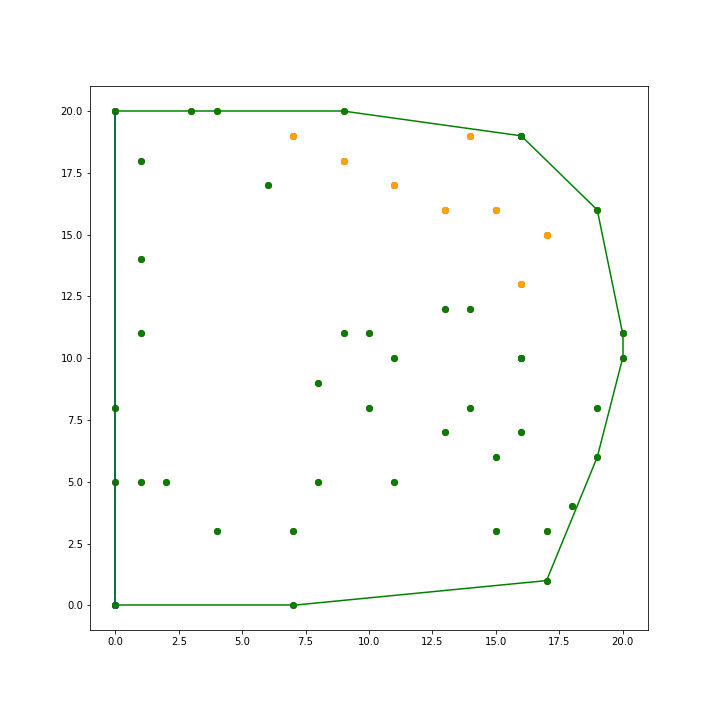

In [347]:
figure, ax = plt.subplots(figsize=(10,10))
axes = figure.axes

for point in input_points:
    plt.scatter(point[0], point[1], color = 'red')
    
x1, y1 = left.x, left.y,
x2, y2 = right.x, right.y

plt.scatter(x1, y1, color = 'red')
plt.scatter(x2, y2, color = 'red')

draw_line(x1, y1, x2, y2, figure, ax, color = 'red')  
    
for point in upper:
    plt.scatter(point.x, point.y, color = 'orange')
    
for point in lower:
    plt.scatter(point.x, point.y, color = 'green')
    
plt.scatter(c.x, c.y, color = 'blue')
plt.scatter(d.x, d.y, color = 'blue')

draw_line(x1, y1, c.x, c.y, figure, ax, color = 'blue') 
draw_line(x2, y2, c.x, c.y, figure, ax, color = 'blue')
draw_line(x1, y1, d.x, d.y, figure, ax, color = 'blue') 
draw_line(x2, y2, d.x, d.y, figure, ax, color = 'blue') 

remove_line(axes, figure, -5)

draw_line(x1, y1, 9, 20, figure, ax, color = 'green')
plt.scatter(x1, y1, color = 'green')
plt.scatter(3, 20, color = 'green')
plt.scatter(4, 20, color = 'green')
plt.scatter(9, 20, color ='green')
draw_line(c.x, c.y, 9, 20, figure, ax, color = 'green')  
plt.scatter(c.x, c.y, color = 'green')

remove_line(axes, figure, -6)

draw_line(c.x, c.y, 19, 16, figure, ax, color = 'green')  
plt.scatter(c.x, c.y, color = 'green')
plt.scatter(19, 16, color ='green')
draw_line(19, 16, x2, y2, figure, ax, color = 'green')  
plt.scatter(x2, y2, color = 'green')

remove_line(axes, figure, -7)

draw_line(x1, y1, d.x, d.y, figure, ax, color = 'green') 

draw_line(x2, y2, 17, 1, figure, ax, color = 'blue') 
draw_line(0, 0, 17, 1, figure, ax, color = 'blue') 
plt.scatter(0, 0, color = 'green')

remove_line(axes, figure, -8)

draw_line(0, 0, 7, 0, figure, ax, color = 'green')  
draw_line(7, 0, 17, 1, figure, ax, color = 'green') 

remove_line(axes, figure, -3)

draw_line(x2, y2, 19, 6, figure, ax, color = 'blue')  
draw_line(19, 6, 17, 1, figure, ax, color = 'green') 

remove_line(axes, figure, -5)

draw_line(x2, y2, 20, 10, figure, ax, color = 'green')  
draw_line(20, 10, 19, 6, figure, ax, color = 'green') 

remove_line(axes, figure, -4)

# for point in left_points:
#     plt.scatter(point.x, point.y, color = 'blue')
    
# plt.scatter(furthest_u.x, furthest_u.y, color = 'orange')
# plt.scatter(furthest_l.x, furthest_l.y, color = 'pink')

# x1, y1 = left.x, left.y
# x2, y2 = right.x, right.y
            
# draw_line(x1, y1, x2, y2, figure, ax, color = 'blue')  


# x1, y1 = left.x, left.y
# x2, y2 = furthest_u.x, furthest_u.y
# draw_line(x1, y1, x2, y2, figure, ax, color = 'blue')  


# x1, y1 = right.x, right.y
# x2, y2 = furthest_u.x, furthest_u.y
# draw_line(x1, y1, x2, y2, figure, ax, color = 'blue')  


# x1, y1 = right.x, right.y
# x2, y2 = furthest_l.x, furthest_l.y
# draw_line(x1, y1, x2, y2, figure, ax, color = 'blue')  


# x1, y1 = left.x, left.y
# x2, y2 = furthest_l.x, furthest_l.y
# draw_line(x1, y1, x2, y2, figure, ax, color = 'blue') 

In [339]:
left_points, right_points, c_point = find_upper_hull(upper, left, right)

TypeError: cannot unpack non-iterable Point object

In [230]:
left_points

In [220]:
for point in left_points:
    plt.scatter(point.x, point.y, color = 'blue')

In [233]:
c_point.x, c_point.y

(13, 25)

In [244]:
h = quickhull(points)

In [246]:
for point in h:
    print(point.x, point.y)

2 18
13 25
4 25
25 11
3 24


In [248]:
h = quickhull(points)

In [249]:
for point in h:
    print(point.x, point.y)

2 18
13 25
19 0
4 25
24 9
25 11
4 0
2 6
3 24


<IPython.core.display.Javascript object>


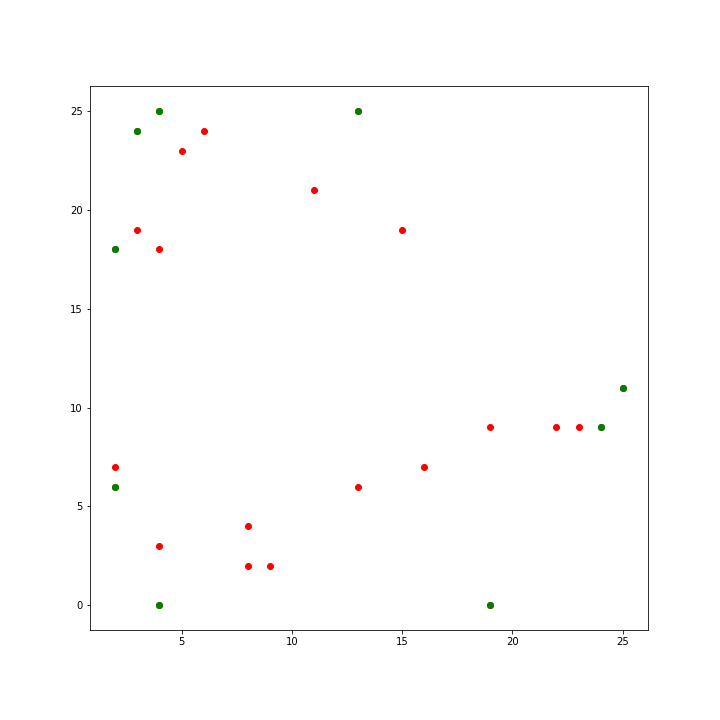

In [250]:
figure, ax = plt.subplots(figsize=(10,10))
axes = figure.axes

for point in input_points:
    plt.scatter(point[0], point[1], color = 'red')
    
for point in h:
    plt.scatter(point.x, point.y, color = 'green')
    
